# Depth of upwelling Ariane experiment 

Planning for where and when will particles be released. 


In [1]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('paper')

In [4]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)
#for dimobj in CanyonStateOut.variables.values():
#    print dimobj


In [36]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
rc = CanyonGridOut.variables['RC']
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 


The shelf-break isobath (sb=315.36 m) upstream of the canyon corresponds to the y-index 198
The corresponding index for z is   (z(29)=147.50 m)


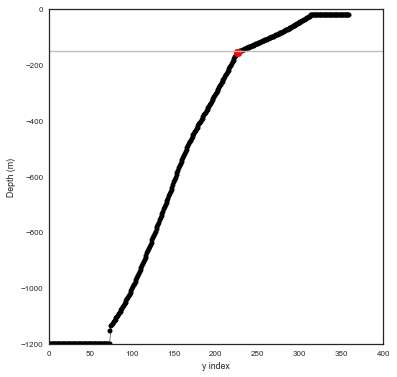

In [6]:
fig = plt.figure(figsize=(6,6))

CS = plt.plot(range(360),-bathy[:,120],'ko-',markersize=5,linewidth=0.5)
plt.plot(226,-bathy[226,120],'ro',markersize=8)
plt.axhline(y=z[29],xmin=0,xmax=360,linestyle='-', color='0.75')

plt.ylabel('Depth (m)')
plt.xlabel('y index')
print('The shelf-break isobath (sb=%.2f m) upstream of the canyon corresponds to the y-index 198' % bathy[198,120])
print('The corresponding index for z is   (z(29)=%.2f m)' % -z[29])

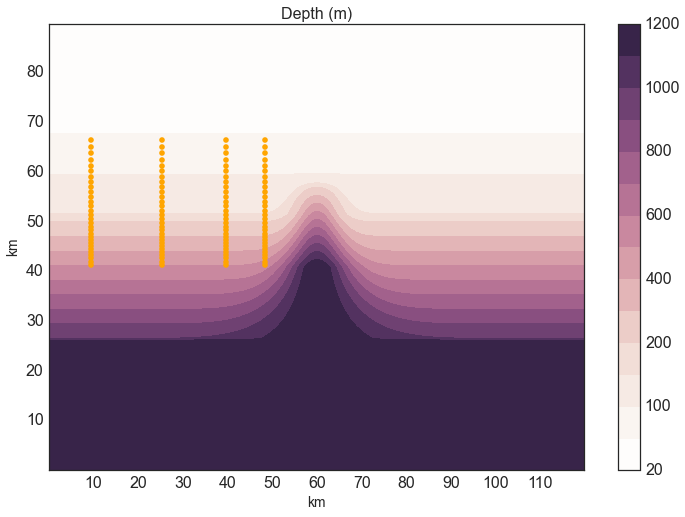

In [90]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(12,8))

plt.plot(xc[150:300:5,15],yc[150:300:5,15], 'o',color = 'orange')
plt.plot(xc[150:300:5,45],yc[150:300:5,45], 'o',color = 'orange')
plt.plot(xc[150:300:5,80],yc[150:300:5,80], 'o',color = 'orange')
plt.plot(xc[150:300:5,110],yc[150:300:5,110], 'o',color = 'orange')

#for ii in range(0,360,10):
#    plt.axhline(y=yc[ii,1],xmin=0,xmax=360,linestyle='-', color='0.75')

levels = [20,50,100,148.17,200,300,400,500,600,700,800,900,1000,1100,1200]

cmapPurple = sns.cubehelix_palette(light=1, as_cmap=True)
cmapBlue = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

CS = plt.contourf(xc,yc,bathy,levels,cmap=cmapPurple)
                  
                  #linewidths=[0.75,0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )
plt.colorbar(CS)
#plt.clabel(CS, 
#          inline=1,
#          fmt='%1.1f',
#           fontsize=12)

    
plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)


(90, 360)


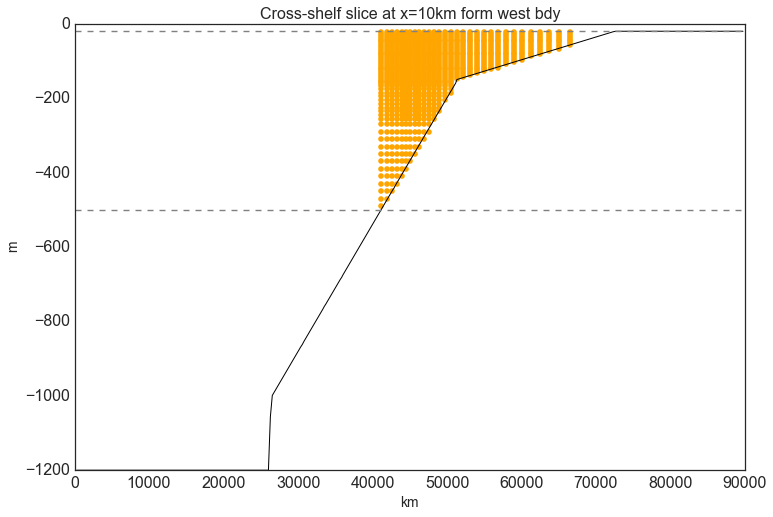

In [91]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(12,8))

y,z = np.meshgrid(yc[:,15],rc[:])

y=np.ma.masked_array(y,mask=MaskC[:,:,15])
z=np.ma.masked_array(z,mask=MaskC[:,:,15])

plt.plot(y[4:56:1,150:300:5],z[4:56:1,150:300:5], 'o',color = 'orange')

plt.plot(yc[:,15],-bathy[:,15],'k-',linewidth=1)

plt.axhline(-20,color='0.50',linestyle='--')
plt.axhline(-500,color='0.50',linestyle='--')
#plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
#plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('m',fontsize=14)

plt.title('Cross-shelf slice at x=10km form west bdy',fontsize=16)

print(np.shape(y))

## Zoom in plots

Each red dot is a release site


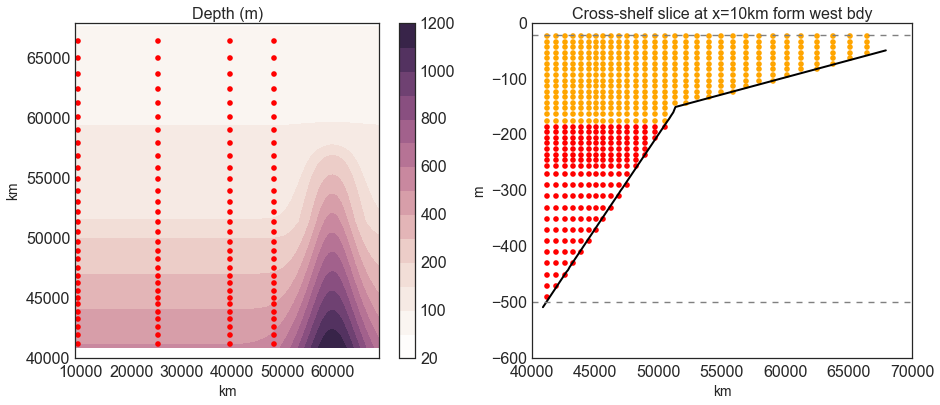

In [107]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig,(ax1,ax2) = plt.subplots(1,2 ,figsize=(15,6))

ax1.plot(xc[150:300:5,15],yc[150:300:5,15], 'o',color = 'red')
ax1.plot(xc[150:300:5,45],yc[150:300:5,45], 'o',color = 'red')
ax1.plot(xc[150:300:5,80],yc[150:300:5,80], 'o',color = 'red')
ax1.plot(xc[150:300:5,110],yc[150:300:5,110], 'o',color = 'red')

#for ii in range(0,360,10):
#    plt.axhline(y=yc[ii,1],xmin=0,xmax=360,linestyle='-', color='0.75')

levels = [20,50,100,148.17,200,300,400,500,600,700,800,900,1000,1100,1200]

cmapPurple = sns.cubehelix_palette(light=1, as_cmap=True)
cmapBlue = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

CS = ax1.contourf(xc[148:301,14:240],yc[148:301,14:240],bathy[148:301,14:240],levels,cmap=cmapPurple)
                  
plt.colorbar(CS,ax=ax1)
    
ax1.set_xticks(np.arange(10000,70000,10000), ['10','20','30','40','50','60','70'])
ax1.set_yticks(np.arange(40000,70000,10000), ['40','50','60','70'])

ax1.set_xlabel('km',fontsize=14)
ax1.set_ylabel('km',fontsize=14)

ax1.set_title('Depth (m)',fontsize=16)

# Ax2

plt.plot(y[4:35:2,150:300:5],z[4:35:2,150:300:5], 'o',color = 'orange')
plt.plot(y[35:56:1,150:300:5],z[35:56:1,150:300:5], 'o',color = 'red')

plt.plot(yc[148:301,15],-bathy[148:301,15],'k-',linewidth=2)


plt.axhline(-20,color='0.50',linestyle='--')
plt.axhline(-500,color='0.50',linestyle='--')
#plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
#plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('m',fontsize=14)

plt.title('Cross-shelf slice at x=10km form west bdy',fontsize=16)

print('Each red dot is a release site')

## Horizontal and vertical spacing

Horizontal spacing 550 m near shelf break and grows to up to 1400 m at inner shelf 
Vertical spacing 10 m in the first 250 m and 20 meters from 250-500m


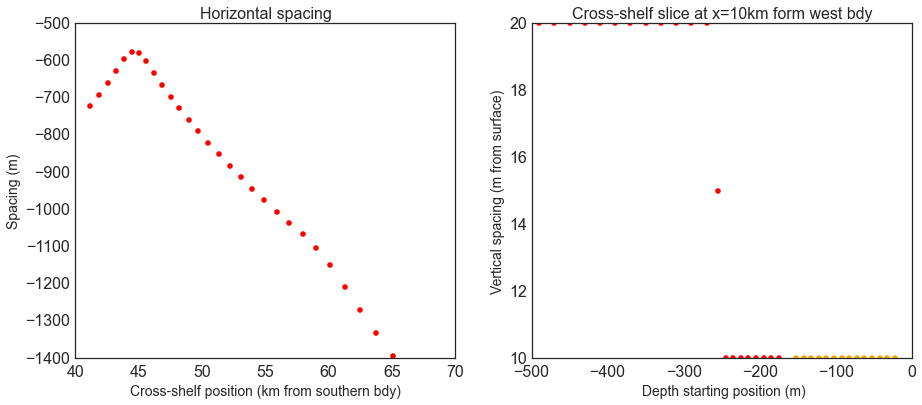

In [104]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig,(ax1,ax2) = plt.subplots(1,2 ,figsize=(15,6))

ax1.plot(yc[150:295:5,15]/1000.0,yc[150:295:5,15]-yc[155:300:5,15], 'o',color = 'red')


ax1.set_xlabel('Cross-shelf position (km from southern bdy) ',fontsize=14)
ax1.set_ylabel('Spacing (m)',fontsize=14)

ax1.set_title('Horizontal spacing',fontsize=16)

# Ax2

plt.plot(rc[4:32:2],rc[4:32:2]-rc[6:34:2], 'o',color = 'orange')
plt.plot(rc[34:55],rc[34:55]-rc[35:56], 'o',color = 'red')


plt.xlabel(' Depth starting position (m)',fontsize=14)
plt.ylabel('Vertical spacing (m from surface)',fontsize=14)

plt.title('Cross-shelf slice at x=10km form west bdy',fontsize=16)

#print('Each red dot is a release site')
print('Horizontal spacing 550 m near shelf break and grows to up to 1400 m at inner shelf ')
print('Vertical spacing 10 m in the first 250 m and 20 meters from 250-500m')

## Prepare initial_positions.txt file
5 columns:

| 1       | 2       |  3                                      | 4          | 5
|:-------:|:-------:|:---------------------------------------:|:----------:|:-----------------------------------:
| x index | y index | z index (negative to stay in one depth)   | time index | always 1 for qualitative    


The idea is to create a dataframe with these 5 columns and as many rows as particles I want to include and then save as a csv file with delimiter set to 'tab'.

Also, remember indices start at 1 in Ariane, not in 0 as in python.

In [108]:
import pandas as pd

In [123]:
#column 5
#Parameter = np.ones(PartNum)

#column 4 - Time indices
times = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]

xind = [15,45,80,110]

yy = np.arange(0,359)
xx = np.arange(0,350)
zi = np.arange(0,89)

xi,yi = np.meshgrid(xx,yy)  # These are like yc and xc but index version

yp,zp = np.meshgrid(yi[:,xind[0]],zi[:])

yp = np.ma.masked_array(yp,mask=MaskC[:,:,xind[0]])
zp = 
np.ma.masked_array(zp,mask=MaskC[:,:,xind[0]])

yind = np.reshape(yp,(1,np.shape(yp)[0]*np.shape(yp)[1]))

#raw_data = {'time':day, 'CS1': V_CS1, 'CS2': V_CS2, 'CS3': V_CS3, 'CS3sb': V_CS3sb, 'CS4': V_CS4, 'CS5': V_CS5, 'AS1':U_AS1, 'AS2': U_AS2, 'LID1': W_LID1, 'LID2': W_LID2}
#    df = pd.DataFrame(raw_data, columns = ['day', 'CS1', 'CS2', 'CS3', 'CS3sb', 'CS4', 'CS5', 'AS1', 'AS2', 'LID1', 'LID2'])
    
#    filename1 = ('results/metricsDataFrames/CNTDIFF_CS_ADVFLUX_%s%s.csv' % (run,trstr))
#    df.to_csv(filename1)
    

In [124]:
print(yind)

[[218.61183831892063 655.6566155935836 1092.167191629559 ..., -- -- --]]
